In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/adausdt_2020.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2019-12-31 08:00:00,0.03343,0.03382,0.03279,0.03285,45408660.4,1577836799999,1.509814e+06,6894,23264318.8,7.736567e+05,0
1,2020-01-01 08:00:00,0.03285,0.03380,0.03270,0.03348,29827408.5,1577923199999,9.955444e+05,6116,14857010.7,4.958391e+05,0
2,2020-01-02 08:00:00,0.03345,0.03348,0.03218,0.03269,42826456.1,1578009599999,1.406391e+06,7453,19344719.1,6.353559e+05,0
3,2020-01-03 08:00:00,0.03269,0.03446,0.03236,0.03417,102581046.7,1578095999999,3.470143e+06,15068,53816813.9,1.820772e+06,0
4,2020-01-04 08:00:00,0.03417,0.03450,0.03375,0.03434,55528746.4,1578182399999,1.892276e+06,7992,26567804.8,9.061852e+05,0


In [4]:
import sys
sys.path.append('../')
from rsibot import *

## Result

In [5]:
ewma_slow = df['Close'].ewm(span=26, adjust=False).mean()
ewma_fast = df['Close'].ewm(span=12, adjust=False).mean()

In [6]:
macd_tb = compute_macd(df['Close'], 26, 12, 9)
macd_tb.tail()

,macd,signal,hist
362,0.002973,0.004297,-0.001324
363,0.004446,0.004327,0.000119
364,0.006698,0.004801,0.001897
365,0.007845,0.005410,0.002435
366,0.008451,0.006018,0.002433


In [7]:
close_prices = df['Close']
macd_tb['rsi'] = get_rsi(df)
buy_price, sell_price, macd_signal = macd_strategy(close_prices, macd_tb)

In [8]:
macd_tb['position'] = create_position(close_prices, macd_signal)
macd_tb['macd_signal'] = macd_signal
macd_tb.tail()

,macd,signal,hist,rsi,position,macd_signal
362,0.002973,0.004297,-0.001324,50.330695,1,0
363,0.004446,0.004327,0.000119,58.018695,1,0
364,0.006698,0.004801,0.001897,65.544872,1,0
365,0.007845,0.005410,0.002435,57.093955,1,0
366,0.008451,0.006018,0.002433,58.264387,1,0


In [9]:
cp_returns = np.diff(close_prices)

In [10]:
from math import floor

investment_value = 1e5
num_of_stocks = floor(investment_value / close_prices[0])
num_of_stocks

3044140

In [11]:
strategy_return = []
# cp_returns * macd_tb['position'][:-1]
for i in range(1,len(cp_returns)):
    r = cp_returns[i] * macd_tb['position'][i]
    strategy_return.append(r)

strategy_return

[-0.000790000000000006,
 0.0014800000000000021,
 0.00017000000000000348,
 0.00025999999999999635,
 0.00272,
 -0.00032000000000000084,
 -0.0006899999999999962,
 -0.0001500000000000043,
 0.0007699999999999999,
 -0.00014999999999999736,
 0.0011400000000000021,
 -0.0011000000000000038,
 0.004790000000000003,
 0.0011400000000000021,
 -0.0010700000000000015,
 0.0032200000000000006,
 -1.0000000000003062e-05,
 -0.0028899999999999967,
 0.0017799999999999969,
 0.002239999999999999,
 -0.0002699999999999994,
 -0.002569999999999996,
 0.0017699999999999938,
 -0.0018099999999999991,
 0.0016299999999999995,
 0.0031900000000000053,
 0.00494,
 0.0003899999999999945,
 0.0028500000000000053,
 -0.002239999999999999,
 0.0021999999999999936,
 -0.0003999999999999976,
 0.0012599999999999972,
 -0.0009499999999999995,
 0.0033200000000000035,
 0.0007500000000000007,
 -0.00021000000000000185,
 0.00014999999999999736,
 0.0018600000000000005,
 -0.0015899999999999942,
 0.0030600000000000002,
 0.004819999999999991,
 0

In [12]:
np.sum(strategy_return)

0.1033

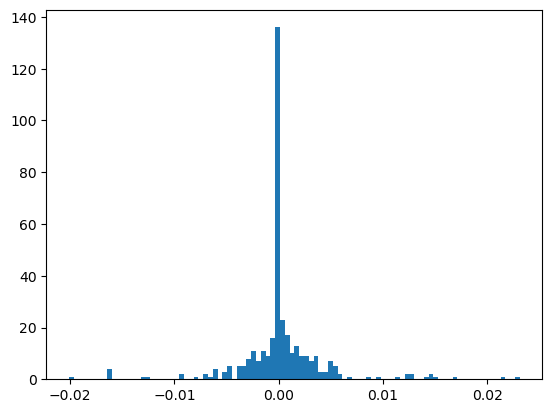

In [20]:
plt.hist(strategy_return, bins='auto')
plt.show()

## RSI strategy

In [14]:
df = pd.read_csv("../data/adausdt_2020.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2019-12-31 08:00:00,0.03343,0.03382,0.03279,0.03285,45408660.4,1577836799999,1.509814e+06,6894,23264318.8,7.736567e+05,0
1,2020-01-01 08:00:00,0.03285,0.03380,0.03270,0.03348,29827408.5,1577923199999,9.955444e+05,6116,14857010.7,4.958391e+05,0
2,2020-01-02 08:00:00,0.03345,0.03348,0.03218,0.03269,42826456.1,1578009599999,1.406391e+06,7453,19344719.1,6.353559e+05,0
3,2020-01-03 08:00:00,0.03269,0.03446,0.03236,0.03417,102581046.7,1578095999999,3.470143e+06,15068,53816813.9,1.820772e+06,0
4,2020-01-04 08:00:00,0.03417,0.03450,0.03375,0.03434,55528746.4,1578182399999,1.892276e+06,7992,26567804.8,9.061852e+05,0


In [15]:
rets = df['Close'].diff()
rets.head()

0        NaN
1    0.00063
2   -0.00079
3    0.00148
4    0.00017
Name: Close, dtype: float64

In [16]:
rsi_df = pd.DataFrame(index=df.index)

rsi_df['down'] = np.where(rets < 0, rets, 0)
rsi_df['up'] = np.where(rets >= 0, rets, 0)

In [17]:
rsi_df.head()

,down,up
0,0.00000,0.00000
1,0.00000,0.00063
2,-0.00079,0.00000
3,0.00000,0.00148
4,0.00000,0.00017


In [18]:
ma_down = rsi_df['down'].rolling(14).mean()
ma_up = rsi_df['up'].rolling(14).mean()

rs = ma_up / np.abs(ma_down)
rs

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
362    1.013316
363    1.382013
364    1.902326
365    1.330674
366    1.396035
Length: 367, dtype: float64

In [19]:
rsi_list = 100 * rs / (1 + rs)